In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd


In [2]:

data = pd.read_csv('student.csv')
data.head(10)

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
5,2.403951,49.757016,0
6,1.522753,94.655631,0
7,8.795585,89.352235,1
8,6.410035,96.987995,1
9,7.372653,83.543171,1


In [3]:
data.rename(columns = {'Study Hours' : 'study'}, inplace = True)
data.rename(columns = {'Previous Exam Score' : 'score'}, inplace = True)

In [4]:
data.head(10)

,study,score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
5,2.403951,49.757016,0
6,1.522753,94.655631,0
7,8.795585,89.352235,1
8,6.410035,96.987995,1
9,7.372653,83.543171,1


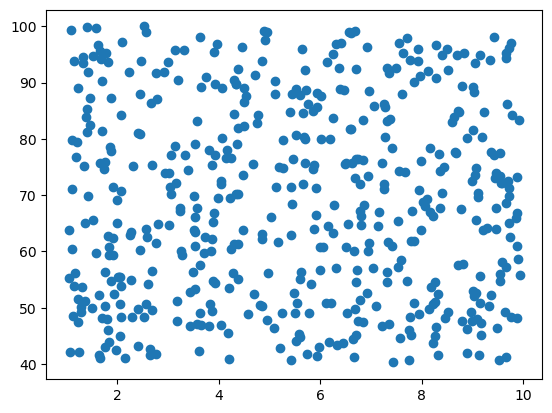

In [5]:
plt.scatter(data['study'], data['score'])

In [6]:
def gradient_descent(m_now, b_now, points, L):
    
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        
        x= points.iloc[i].study
        y = points.iloc[i].score
        
        m_gradient += -(2/n) * x *(y - (m_now * x + b_now))
        
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    
    return m, b
    
m = 0
b = 0
L = 0.0001

epochs = 400

for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
print(m , b)

9.363177893757605 2.4130386957672734


9.363177893757605 2.4130386957672734


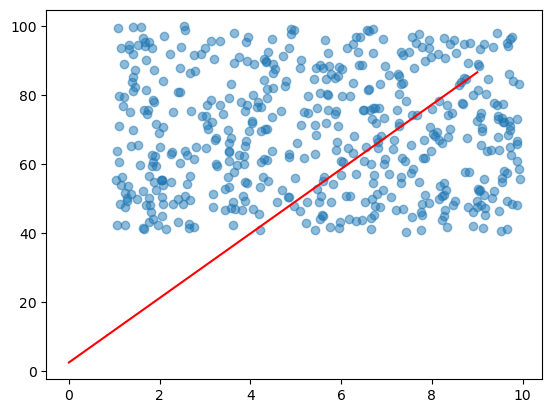

In [12]:
print(m , b)
plt.scatter(data.study, data.score, alpha = 0.5)
x_line = list(range(0, 10))
y_line = [m * x + b for x in x_line]

plt.plot(x_line, y_line, color='red')

In [8]:
print(data['study'].corr(data['score']))


0.010354204028283442


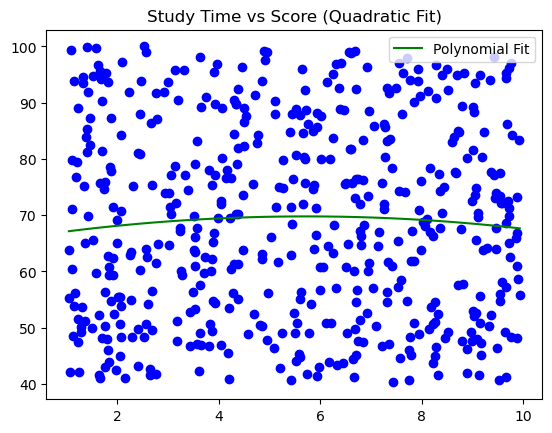

In [9]:
coeffs = np.polyfit(data['study'], data['score'], deg=2)  # quadratic
poly_eq = np.poly1d(coeffs)

x_line = np.linspace(data['study'].min(), data['study'].max(), 100)
y_line = poly_eq(x_line)

plt.scatter(data['study'], data['score'], color='blue')
plt.plot(x_line, y_line, color='green', label='Polynomial Fit')
plt.legend()
plt.title("Study Time vs Score (Quadratic Fit)")
plt.show()
